## TensorFlow-AutoEncoder

**AutoEncoders** is a neural network architecture which is used learn encodings of data in an. efficient manner. In the notebook below we will use **AutoEncoder** to de-noise a noisy image.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import random

%matplotlib inline

In [2]:
#Load fashion MNIST dataset
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

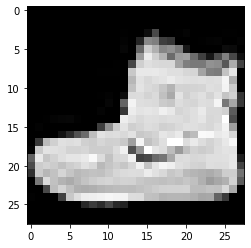

In [5]:
#lets see one image
plt.imshow( X_train[0] , cmap = 'gray') 

In [6]:
#Normalize the data
X_train = X_train / 255
X_test = X_test / 255

In [7]:
#lets add noise to train data
X_train_noisy = []
noise_factor = 0.2

for sample_image in X_train:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_train_noisy.append(sample_image_noisy)

X_train_noisy = np.array(X_train_noisy)

#lets add noise to test data
X_test_noisy = []

for sample_image in X_test:
  sample_image_noisy = sample_image + noise_factor * np.random.randn(*(28,28))
  sample_image_noisy = np.clip(sample_image_noisy, 0., 1.)
  X_test_noisy.append(sample_image_noisy)

# Convert from list to array
X_test_noisy = np.array(X_test_noisy)

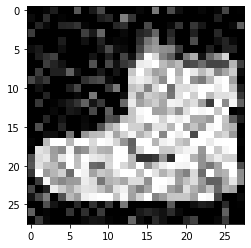

In [8]:
plt.imshow( X_train_noisy[0] , cmap = 'gray') 

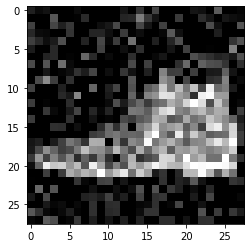

In [9]:
plt.imshow( X_test_noisy[0] , cmap = 'gray') 

In [10]:
#Build the auto encoder model
autoencoder = tf.keras.models.Sequential()

# Let's build the encoder CNN
autoencoder.add(tf.keras.layers.Conv2D(16, (3,3), strides=1, padding="same", input_shape=(28, 28, 1)))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))

autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))
autoencoder.add(tf.keras.layers.MaxPooling2D((2,2), padding="same"))

# Encoded image (code layer)
autoencoder.add(tf.keras.layers.Conv2D(8, (3,3), strides=1, padding="same"))

# Let's build the decoder CNN 
autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(8,(3,3), strides=1, padding="same"))

autoencoder.add(tf.keras.layers.UpSampling2D((2, 2)))
autoencoder.add(tf.keras.layers.Conv2DTranspose(1, (3,3), strides=1, activation='sigmoid', padding="same"))

In [11]:
autoencoder.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(lr=0.001))
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         5

In [12]:
autoencoder.fit(X_train_noisy.reshape(-1, 28, 28, 1),          
          X_train.reshape(-1, 28, 28, 1), 
          epochs=50, 
          batch_size=200)

Epoch 1/50
300/300 [==============================] - 8s 4ms/step - loss: 0.4332
Epoch 2/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3111
Epoch 3/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3047
Epoch 4/50
300/300 [==============================] - 1s 4ms/step - loss: 0.3013
Epoch 5/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2994
Epoch 6/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2975
Epoch 7/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2973
Epoch 8/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2966
Epoch 9/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2957
Epoch 10/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2942
Epoch 11/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2942
Epoch 12/50
300/300 [==============================] - 1s 4ms/step - loss: 0.2928
Epoch 13/50
300/300 [====

In [13]:
# Let's pick up 15 images and run them through the trained autoencoder
denoised_images = autoencoder.predict(X_test_noisy[:15].reshape(-1, 28, 28, 1))

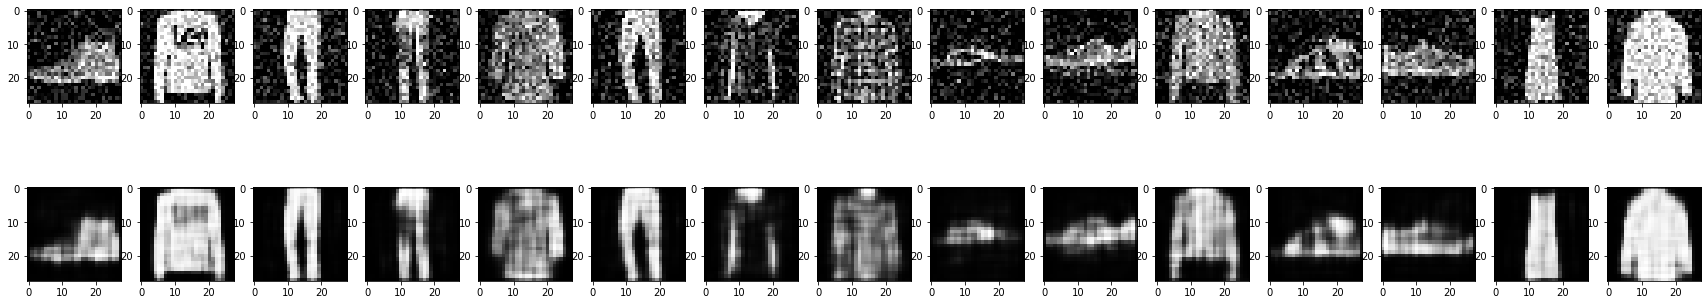

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=15, figsize=(30,6))
for images, row in zip([X_test_noisy[:15], denoised_images], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='gray')
    